<h3>زمانی ما از لاجستیک رگرشن استفاده میکنیم که تارگتی که قرار پردیکت بشه حالت پیوسته نداره یعنی صفر و یکی هست مثل اینکه بگیم بیمار  یا سالمه دیابت داره دیابت نداره و غیره<h3>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

In [2]:
data = pd.read_csv('diabetes.csv')
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df = pd.DataFrame(data)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
normal = scaler.fit_transform(df)
df_normal = pd.DataFrame(normal, columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'])

In [6]:
X = pd.DataFrame(df_normal, columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
y = df_normal.Outcome.values.reshape(-1,1)

In [7]:
# X = pd.DataFrame(df, columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
# y = df.Outcome.values.reshape(-1,1)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
logreg = LogisticRegression(solver='liblinear') #! برای جلوگیری از وارنینگ زمانی که مدل رو فیت میکنیم

In [10]:
logreg.fit(X_train, y_train.ravel())

LogisticRegression(solver='liblinear')

In [11]:
y_pred = logreg.predict(X_test)

In [12]:
y_pred

array([1., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [13]:
compar =pd.DataFrame({'actual': y_test.flatten(),
          'predict' : y_pred.flatten()})

In [14]:
compar

,actual,predict
0,1.0,1.0
1,0.0,0.0
2,0.0,0.0
3,1.0,1.0
4,0.0,0.0
...,...,...
149,1.0,0.0
150,0.0,0.0
151,1.0,0.0
152,0.0,0.0


In [15]:
print("Accuracy : ",metrics.accuracy_score(y_test, y_pred))

Accuracy :  0.8051948051948052


In [16]:
# plt.scatter(X_test , y_test, label='data1') #? بدون کرو یا شکستگی که نشانه ی جدایی دو تارگت گسسته ماست
# plt.plot(X_test, y_pred ,label='data2')
# # plt.legend(loc=2)
# # plt.legend(loc='best')
# plt.legend(loc=4)
# plt.show()

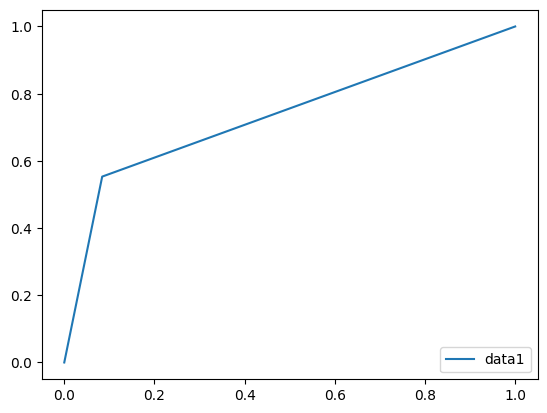

In [17]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred) #! استفاده از این کد برای اینه او کرو با شکست رو بخوبی مشاهده کنیم که داره دیتارو از حالت خطی به  سیگموییدی تبدیل میکنه
plt.plot(fpr, tpr, label='data1')
plt.legend(loc=4)
# plt.legend(loc='best')
# plt.legend(loc=6)
plt.show()

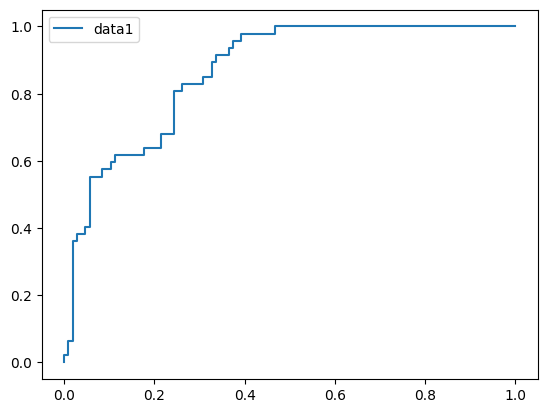

In [18]:
y_pred_proba = logreg.predict_proba(X_test)[ : : ,1] #! با پروبا کاری میکنیم که علاوه بر باینری بودن(صفر و یک) ما داده بین انها رو هم به عنوان ایگرگ داشته باشیم هرچند این عدد قابل استفاده برای ما در مدل نیست و ما برای انتخاب باید بین دو گزینه یکی رو مد نظر قرار بدیم بگیم دیابت دارد یا ندارد
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
plt.plot(fpr, tpr, label='data1')
plt.legend(loc='best')
plt.show()

In [19]:
from sklearn.metrics import classification_report, confusion_matrix #! کلسیفکیشن ریپورد برای ارزیابی هست که ریکال و پرسیزن داشت و کانفیوژن ماتریس همون TP,TN,TN,FP هست

In [20]:
logreg.classes_#! مقدار های تارگیتی که دیسکریت هست رو به ما نشون میده ما اینجا برای دیبات دو تا بود یا دیبات دارد یا ندارد

array([0., 1.])

In [21]:
logreg.intercept_ #! عرض از مبدا

array([-4.17079895])

In [22]:
logreg.coef_ #! شیب

array([[ 1.01061794,  3.79448512, -1.1695735 ,  0.39307893, -0.03604907,
         2.38981879,  1.1800004 ,  1.17794597]])

In [23]:
logreg.predict(X) #! نشان دهنده اینکه یک نفر با چهد فیچر متفاوت دیابت دارد یا خیر و تک بعدی و ایگرگ دارددو مثل اهن ربا به سمت یک و صفر عدد هارو میکشد

array([1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 0., 1., 0., 0.

In [24]:
logreg.predict_proba(X) #!دو بعدی است یعنی ایکس و ایگرگ نشون میده و برای ما ایگرگ مهمه یعنی دومین ستون 

array([[0.37770833, 0.62229167],
       [0.84901719, 0.15098281],
       [0.37151398, 0.62848602],
       ...,
       [0.7263303 , 0.2736697 ],
       [0.63760702, 0.36239298],
       [0.83816461, 0.16183539]])

In [25]:
logreg.score(X, y)

0.76953125

In [26]:
confusion_matrix(y, logreg.predict(X)) #! باید دقت بشه اولین میشه سطر دومین عدد میشه ستون حالا به ترتیب میشه سالمی که سالم تشخیص داده شده رو بروش سالمی که مریض تشخیص داده شدهو پاییا  مرضی که سالم تشخیص داده شده و روبروش مریضی که مریض تشخیص داده شده

array([[453,  47],
       [130, 138]])

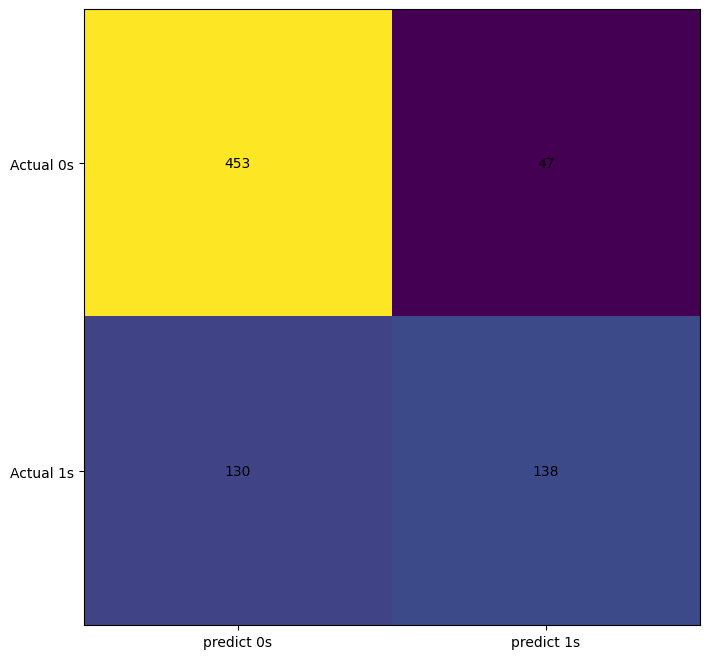

In [27]:
cm = confusion_matrix(y, logreg.predict(X)) #! رسم پلات برای  جلوه بسری و پرزنت 
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('predict 0s', 'predict 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black') #! توجه بشه به جای ای و جی ها چون ممکنه اشتباه قرار بده بنابراین بصری با عددی چک شود
plt.show()

In [28]:
print(classification_report(y, logreg.predict(X))) #! اینم از ارزیابی ریکال و پرسیژن و اف وان اسکور که با تابع ریپورت قابل خروجی گرفتن است 

              precision    recall  f1-score   support

         0.0       0.78      0.91      0.84       500
         1.0       0.75      0.51      0.61       268

    accuracy                           0.77       768
   macro avg       0.76      0.71      0.72       768
weighted avg       0.77      0.77      0.76       768



In [29]:
df2 = pd.DataFrame({
    'Pregnancies' : [0],
    'Glucose' : [80],
    'BloodPressure' : [72],
    'SkinThickness' : [0],
    'Insulin' : [0],
    'BMI' : [23],
    'DiabetesPedigreeFunction' : [0.5],
    'Age' : [30],
    'Outcome' : [1]
})

In [30]:
df3 = df.append(df2)
df3

/var/folders/0x/4j96rnd13md_8_5yl32pjc6w0000gn/T/ipykernel_7111/572790683.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df3 = df.append(df2)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [31]:
df_iloc = df3.iloc[ : 768]
df_iloc

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [32]:
df_iloc2 = df3.iloc[768: ]
df_iloc2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0,80,72,0,0,23.0,0.5,30,1


In [33]:
X_train = df3[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age' ]][ : 768]
y_train = df3[['Outcome']][ : 768 ].values.reshape(-1, 1)

In [34]:
X_test = df3[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age' ]][768 : ]

In [35]:
model = LogisticRegression(solver='liblinear', C=10, random_state=0)

In [36]:
model.fit(X_train, y_train.ravel())

LogisticRegression(C=10, random_state=0, solver='liblinear')

In [37]:
y_pred = model.predict(X_test)

In [38]:
y_pred

array([0])

In [39]:
model = LogisticRegression(solver='liblinear', C= 10, random_state=0)
model.fit(X, y.ravel())

LogisticRegression(C=10, random_state=0, solver='liblinear')